In [1]:
import pandas as pd
import numpy as np
import yaml
%matplotlib inline

In [2]:
with open("param.yaml", "r") as file:
    param = yaml.load(file.read())
param

{'forget_bias': 1.0,
 'learning_rate': 0.1,
 'length_of_sequences': 60,
 'num_of_hidden_nodes': 2,
 'num_of_input_nodes': 1,
 'num_of_output_nodes': 1,
 'num_of_prediction_epochs': 100,
 'num_of_training_epochs': 2000,
 'optimizer': 'GradientDescentOptimizer',
 'seed': 0,
 'size_of_mini_batch': 100,
 'train_data_path': '../train_data/normal.npy'}

In [3]:
train = np.load(param["train_data_path"])
train

array([[  0.00000000e+00,   1.25333234e-01],
       [  1.25333234e-01,   2.48689887e-01],
       [  2.48689887e-01,   3.68124553e-01],
       ..., 
       [ -3.68124553e-01,  -2.48689887e-01],
       [ -2.48689887e-01,  -1.25333234e-01],
       [ -1.25333234e-01,   3.92877345e-15]])

In [4]:
initial = np.load("initial.npy")
initial

array([  0.00000000e+00,   1.25333234e-01,   2.48689887e-01,
         3.68124553e-01,   4.81753674e-01,   5.87785252e-01,
         6.84547106e-01,   7.70513243e-01,   8.44327926e-01,
         9.04827052e-01,   9.51056516e-01,   9.82287251e-01,
         9.98026728e-01,   9.98026728e-01,   9.82287251e-01,
         9.51056516e-01,   9.04827052e-01,   8.44327926e-01,
         7.70513243e-01,   6.84547106e-01,   5.87785252e-01,
         4.81753674e-01,   3.68124553e-01,   2.48689887e-01,
         1.25333234e-01,  -3.21624530e-16,  -1.25333234e-01,
        -2.48689887e-01,  -3.68124553e-01,  -4.81753674e-01,
        -5.87785252e-01,  -6.84547106e-01,  -7.70513243e-01,
        -8.44327926e-01,  -9.04827052e-01,  -9.51056516e-01,
        -9.82287251e-01,  -9.98026728e-01,  -9.98026728e-01,
        -9.82287251e-01,  -9.51056516e-01,  -9.04827052e-01,
        -8.44327926e-01,  -7.70513243e-01,  -6.84547106e-01,
        -5.87785252e-01,  -4.81753674e-01,  -3.68124553e-01,
        -2.48689887e-01,

In [5]:
output = np.load("output.npy")
output

array([ 0.97054219,  0.99542677,  0.99664259,  0.97980571,  0.94903433,
        0.90724421,  0.85622942,  0.79683995,  0.72917295,  0.65274036,
        0.56663024,  0.46971533,  0.360993  ,  0.24014762,  0.1083529 ,
       -0.0309262 , -0.17179006, -0.3071579 , -0.43118346, -0.5411582 ,
       -0.63743806, -0.72183192, -0.79586411, -0.85972786, -0.9121083 ,
       -0.95087218, -0.97426164, -0.98175704, -0.974038  , -0.95231724,
       -0.91766751, -0.87065327, -0.8112452 , -0.73892903, -0.65298265,
       -0.55295956, -0.43940848, -0.3146871 , -0.18339175, -0.05171674,
        0.07443893,  0.19164547,  0.29994646,  0.40220353,  0.50240505,
        0.60358119,  0.70556152,  0.80333221,  0.88798857,  0.95103145,
        0.98856533,  1.00176418,  0.99455345,  0.97127593,  0.93548083,
        0.88959348,  0.83499062,  0.7721864 ,  0.70101511,  0.6207912 ,
        0.53047967,  0.42894408,  0.31536409,  0.18989888,  0.05454114,
       -0.08623961, -0.22583987, -0.35735172, -0.47602576, -0.58

In [6]:
losses = np.load("losses.npy")
losses

array([[  1.00000000e+01,   5.06403089e-01],
       [  2.00000000e+01,   4.65100288e-01],
       [  3.00000000e+01,   4.53504324e-01],
       [  4.00000000e+01,   4.30691004e-01],
       [  5.00000000e+01,   4.28720653e-01],
       [  6.00000000e+01,   2.52964824e-01],
       [  7.00000000e+01,   1.28045768e-01],
       [  8.00000000e+01,   9.34872925e-02],
       [  9.00000000e+01,   6.41007647e-02],
       [  1.00000000e+02,   5.14015183e-02],
       [  1.10000000e+02,   4.26473096e-02],
       [  1.20000000e+02,   3.38089503e-02],
       [  1.30000000e+02,   2.28780098e-02],
       [  1.40000000e+02,   1.59108117e-02],
       [  1.50000000e+02,   1.17567368e-02],
       [  1.60000000e+02,   7.27781793e-03],
       [  1.70000000e+02,   5.79333678e-03],
       [  1.80000000e+02,   4.57283249e-03],
       [  1.90000000e+02,   4.75384993e-03],
       [  2.00000000e+02,   3.71356611e-03],
       [  2.10000000e+02,   3.90847493e-03],
       [  2.20000000e+02,   2.94273742e-03],
       [  

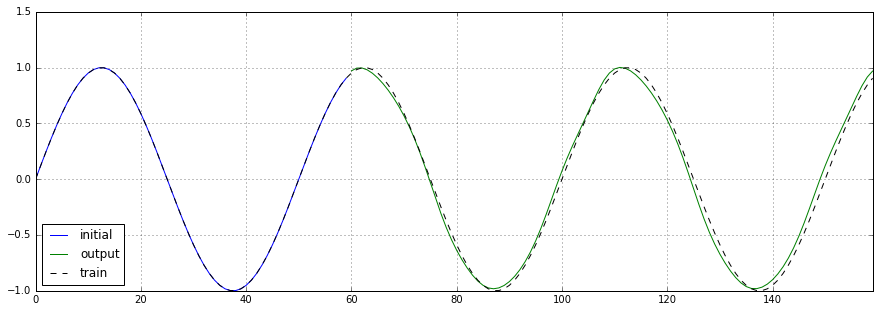

In [7]:
train_df = pd.DataFrame(train[:len(initial) + len(output), 0], columns=["train"])
initial_df = pd.DataFrame(initial, columns=["initial"])
output_df = pd.DataFrame(output, columns=["output"], index=range(len(initial), len(initial) + len(output)))
merged = pd.concat([train_df, initial_df, output_df])
merged.plot(figsize=(15, 5), grid=True, style=["-", "-", "k--"])

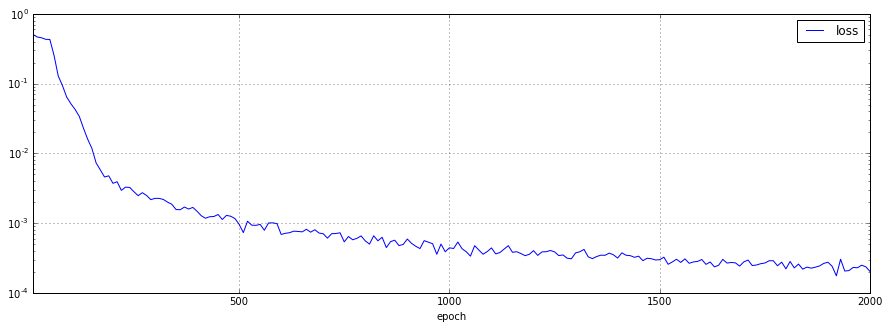

In [8]:
losses_df = pd.DataFrame(losses, columns=["epoch", "loss"])
losses_df.plot(figsize=(15, 5), grid=True, logy=True, x="epoch")